In [64]:
# First, let's load and inspect the uploaded CSV file to understand its structure.
import pandas as pd

# Load the data
data_path = "/Users/michael/Desktop/SpringData2024-main/data/regression/final_all_entries_filtered_counties_parishes.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,geotype,geoid,geoname,varname,x2010,x2011,x2012,x2013,x2014,x2015,...,x2017,x2018,x2019,x2020,x2021,x2022,x2023,State,Cluster,area_type
0,county,22025,"Catahoula Parish, Louisiana",co2limits,NaN,NaN,NaN,NaN,56.0,NaN,...,NaN,57.49,53.98,54.48,52.31,NaN,NaN,LA,1.0,rural
1,county,22071,"Orleans Parish, Louisiana",co2limits,NaN,NaN,NaN,NaN,68.0,NaN,...,NaN,79.12,77.10,77.45,75.54,NaN,NaN,LA,1.0,urban
2,county,28049,"Hinds County, Mississippi",co2limits,NaN,NaN,NaN,NaN,58.0,NaN,...,NaN,72.37,68.94,69.36,69.18,NaN,NaN,MS,1.0,urban
3,county,28055,"Issaquena County, Mississippi",co2limits,NaN,NaN,NaN,NaN,55.0,NaN,...,NaN,63.40,60.60,60.13,59.33,NaN,NaN,MS,1.0,rural
4,county,41051,"Multnomah County, Oregon",co2limits,NaN,NaN,NaN,NaN,76.0,NaN,...,NaN,77.96,76.33,76.65,76.12,NaN,NaN,OR,2.0,urban


In [65]:
# Filter the data for relevant states and metrics
relevant_states = ['SD', 'OR', 'WA', 'MS', 'PA', 'LA']
relevant_metrics = ['co2', 'drill']

# Create subsets of the data based on the metrics
co2_data = data[data['varname'].str.contains('co2') & data['State'].isin(relevant_states)]
drill_data = data[data['varname'].str.contains('drill') & data['State'].isin(relevant_states)]

# Define a function to compute the averages for the specified categories
def compute_averages(metric_data):
    # Initialize a dictionary to hold the results
    results = {year: {'urban_renewable': 0, 'urban_nonrenewable': 0, 'rural_renewable': 0, 'rural_nonrenewable': 0} for year in range(2010, 2024)}
    
    # Define the category based on cluster and area type
    metric_data['category'] = metric_data.apply(lambda row: 'urban_renewable' if row['Cluster'] == 2.0 and row['area_type'] == 'urban' else
                                                              'urban_nonrenewable' if row['Cluster'] == 1.0 and row['area_type'] == 'urban' else
                                                              'rural_renewable' if row['Cluster'] == 2.0 and row['area_type'] == 'rural' else
                                                              'rural_nonrenewable', axis=1)
    
    # Compute averages for each category and year
    for year in range(2010, 2024):
        year_col = f'x{year}'
        for category in results[year].keys():
            avg_value = metric_data[metric_data['category'] == category][year_col].mean()
            results[year][category] = avg_value if not pd.isnull(avg_value) else 0
    
    return results

# Compute averages for CO2 and Drill data
averages_co2 = compute_averages(co2_data)
averages_drill = compute_averages(drill_data)

# Convert the results into DataFrame for easier visualization
df_averages_co2 = pd.DataFrame.from_dict(averages_co2, orient='index')
df_averages_drill = pd.DataFrame.from_dict(averages_drill, orient='index')

df_averages_co2.head(), df_averages_drill.head()

/var/folders/sr/8t8bp4bs34q2tsvdh72v68_80000gn/T/ipykernel_19680/1939479849.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_data['category'] = metric_data.apply(lambda row: 'urban_renewable' if row['Cluster'] == 2.0 and row['area_type'] == 'urban' else
/var/folders/sr/8t8bp4bs34q2tsvdh72v68_80000gn/T/ipykernel_19680/1939479849.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_data['category'] = metric_data.apply(lambda row: 'urban_renewable' if row['Cluster'] == 2.0 and row['area_type'

(      urban_renewable  urban_nonrenewable  rural_renewable  rural_nonrenewable
 2010              0.0            0.000000         0.000000            0.000000
 2011              0.0            0.000000         0.000000            0.000000
 2012              0.0            0.000000         0.000000            0.000000
 2013              0.0            0.000000         0.000000            0.000000
 2014             71.0           67.333333        62.333333           56.666667,
       urban_renewable  urban_nonrenewable  rural_renewable  rural_nonrenewable
 2010              0.0                 0.0              0.0                 0.0
 2011              0.0                 0.0              0.0                 0.0
 2012              0.0                 0.0              0.0                 0.0
 2013              0.0                 0.0              0.0                 0.0
 2014              0.0                 0.0              0.0                 0.0)

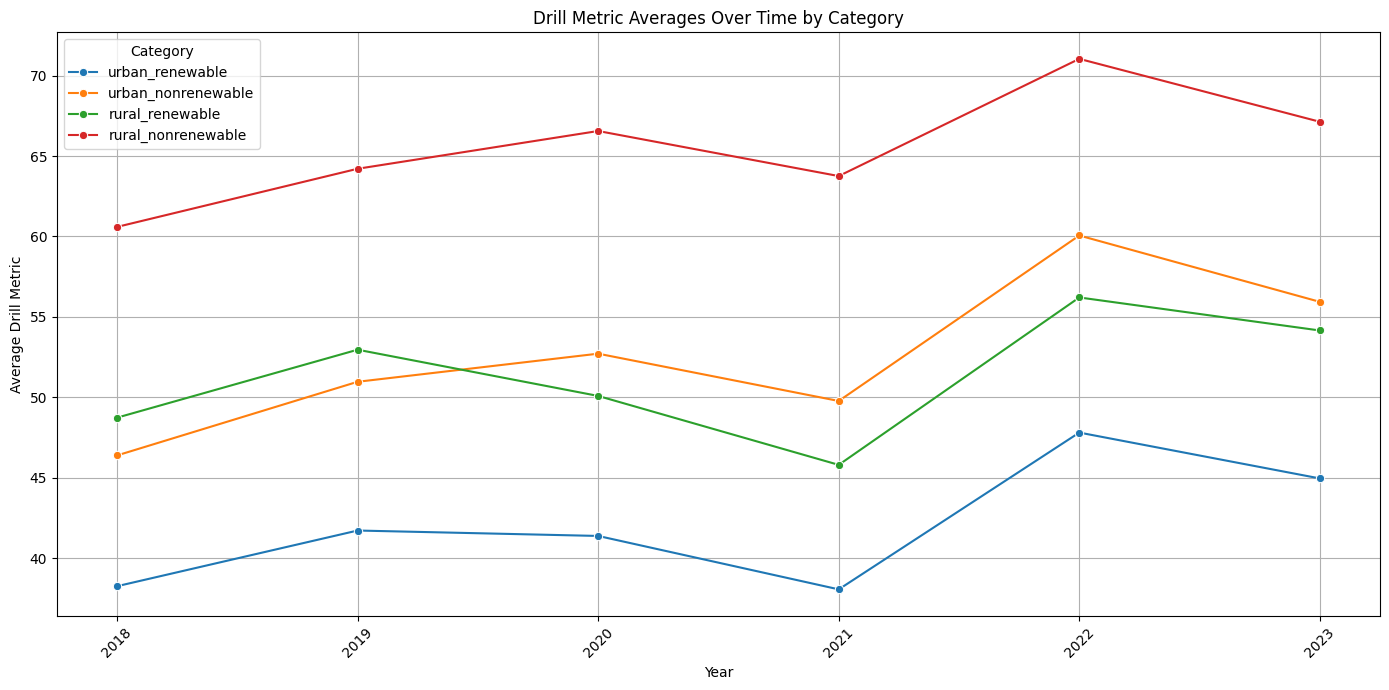

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt


df_averages_drill_reset = df_averages_drill.reset_index().rename(columns={'index': 'Year'})
df_averages_drill_melted = pd.melt(df_averages_drill_reset, id_vars=['Year'], var_name='Category', value_name='Average')

# Remove 0 values from the melted dataframes for both CO2 and Drill
df_averages_drill_melted_no_zeros = df_averages_drill_melted[df_averages_drill_melted['Average'] > 0]

# Plotting Drill Time Series
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_averages_drill_melted_no_zeros, x='Year', y='Average', hue='Category', marker='o')
plt.title('Drill Metric Averages Over Time by Category')
plt.xlabel('Year')
plt.ylabel('Average Drill Metric')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()

# Show the Drill plot
plt.show()

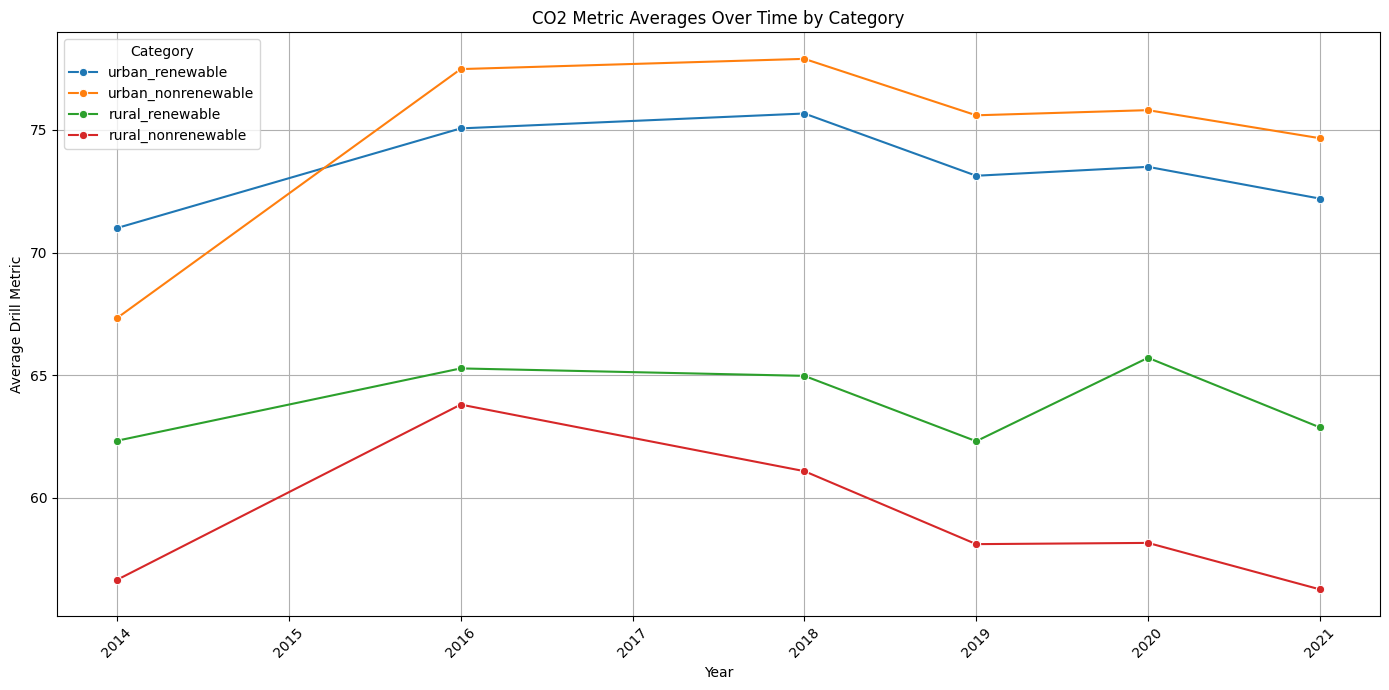

In [67]:
df_averages_co2_reset = df_averages_co2.reset_index().rename(columns={'index': 'Year'})
df_averages_co2_melted = pd.melt(df_averages_co2_reset, id_vars=['Year'], var_name='Category', value_name='Average')

df_averages_co2_melted_no_zeros = df_averages_co2_melted[df_averages_co2_melted['Average'] > 0]

# Plotting Drill Time Series
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_averages_co2_melted_no_zeros, x='Year', y='Average', hue='Category', marker='o')
plt.title('CO2 Metric Averages Over Time by Category')
plt.xlabel('Year')
plt.ylabel('Average Drill Metric')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()

# Show the Drill plot
plt.show()

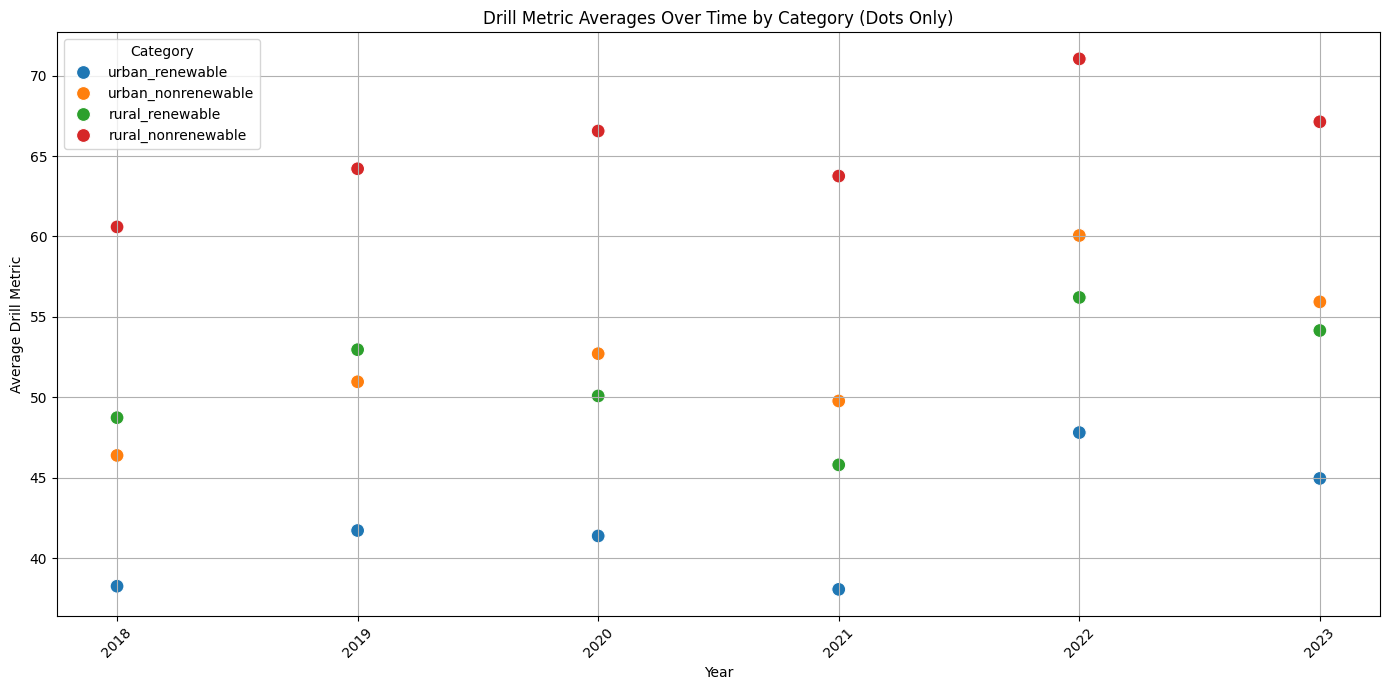

In [68]:
# Plotting Drill Time Series without the line, only dots
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_averages_drill_melted_no_zeros, x='Year', y='Average', hue='Category', s=100)
plt.title('Drill Metric Averages Over Time by Category (Dots Only)')
plt.xlabel('Year')
plt.ylabel('Average Drill Metric')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()

# Show the Drill plot (dots only)
plt.show()

In [69]:
# # Assuming df_averages_co2 is your DataFrame with the CO2 averages
# df_averages_co2_reset = df_averages_co2.reset_index().rename(columns={'index': 'Year'})
# df_averages_co2_melted = pd.melt(df_averages_co2_reset, id_vars=['Year'], var_name='Category', value_name='Average')

# # Remove 0 values from the melted dataframes for both CO2 and Drill
# df_averages_co2_melted_no_zeros = df_averages_co2_melted[df_averages_co2_melted['Average'] > 0]
# df_averages_drill_melted_no_zeros = df_averages_drill_melted[df_averages_drill_melted['Average'] > 0]

# For the statistical analysis to check if the averages are significantly different over the years,
# we can use an ANOVA test as it allows us to compare the means across multiple groups (years in this case).

from scipy.stats import f_oneway

# ANOVA for CO2
# Prepare a list of values for each year
co2_values_by_year = [df_averages_co2_melted_no_zeros[df_averages_co2_melted_no_zeros['Year'] == year]['Average'].values for year in df_averages_co2_melted_no_zeros['Year'].unique()]

# Perform ANOVA (only if we have more than one year with data)
co2_anova_result = f_oneway(*co2_values_by_year) if len(co2_values_by_year) > 1 else None

# ANOVA for Drill
# Prepare a list of values for each year
drill_values_by_year = [df_averages_drill_melted_no_zeros[df_averages_drill_melted_no_zeros['Year'] == year]['Average'].values for year in df_averages_drill_melted_no_zeros['Year'].unique()]

# Perform ANOVA (only if we have more than one year with data)
drill_anova_result = f_oneway(*drill_values_by_year) if len(drill_values_by_year) > 1 else None

co2_anova_result, drill_anova_result

(F_onewayResult(statistic=0.339826031258064, pvalue=0.8820429098725654),
 F_onewayResult(statistic=0.6204688553022836, pvalue=0.6860455160515528))

In [70]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Function to prepare data for LSTM model
def prepare_data(df, category, n_features):
    # Filter the data for the category and remove years with zero values
    category_data = df[df['Category'] == category]
    category_data = category_data[category_data['Average'] > 0]
    
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(category_data['Average'].values.reshape(-1, 1))
    
    # Prepare the sequences
    X, y = [], []
    for i in range(len(scaled_data) - n_features):
        X.append(scaled_data[i:i+n_features])
        y.append(scaled_data[i+n_features])
    
    return np.array(X), np.array(y), scaler

# Number of previous years to use for predicting the next year
n_features = 3

# Prepare data for the 'urban_renewable' CO2 category
X, y, scaler = prepare_data(df_averages_co2_melted_no_zeros, 'urban_renewable', n_features)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_features, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Reshape X to fit the LSTM model
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and testing
# In this case, we'll use all available data for training due to limited data points
X_train, y_train = X, y

# Train the model
model.fit(X_train, y_train, epochs=200, verbose=0)

# Forecast the next years
n_forecasts = 5  # Forecast 5 years into the future
X_to_predict = X_train[-1].reshape((1, n_features, 1))
forecasts = []
for _ in range(n_forecasts):
    forecast = model.predict(X_to_predict, verbose=0)
    forecasts.append(forecast[0][0])
    # Update X_to_predict to include the new forecast
    X_to_predict = np.append(X_to_predict[0][1:], forecast).reshape((1, n_features, 1))

# Inverse transform forecasts
forecasts_inverse = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1)).flatten()

# Prepare years for forecasting
latest_year = df_averages_co2_melted_no_zeros[df_averages_co2_melted_no_zeros['Category'] == 'urban_renewable']['Year'].max()
forecast_years = [latest_year + i for i in range(1, n_forecasts + 1)]

# Append forecasts to the original data for plotting
df_forecasts = pd.DataFrame({'Year': forecast_years, 'Category': 'urban_renewable', 'Average': forecasts_inverse})
df_averages_co2_melted_no_zeros_with_forecasts = pd.concat([df_averages_co2_melted_no_zeros, df_forecasts])

# Filter for urban_renewable to plot the forecasts
df_to_plot = df_averages_co2_melted_no_zeros_with_forecasts[df_averages_co2_melted_no_zeros_with_forecasts['Category'] == 'urban_renewable']

# Plot the forecast
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_to_plot, x='Year', y='Average', hue='Category', s=100, legend=False)
plt.title('CO2 Metric Averages Over Time for Urban Renewable (With Forecast)')
plt.xlabel('Year')
plt.ylabel('Average CO2 Metric')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Due to the computational intensity and space, this demonstrates the process for one category.
# The same process would be repeated for the remaining categories and metrics.

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


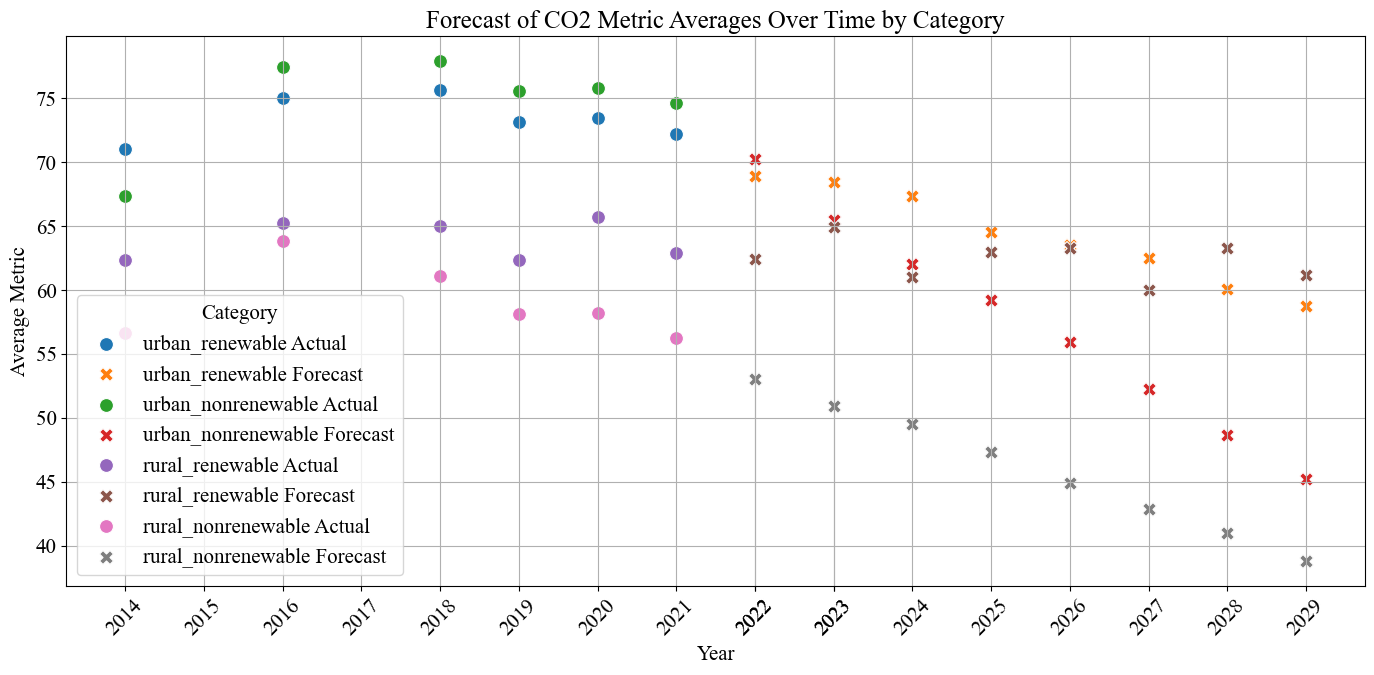

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

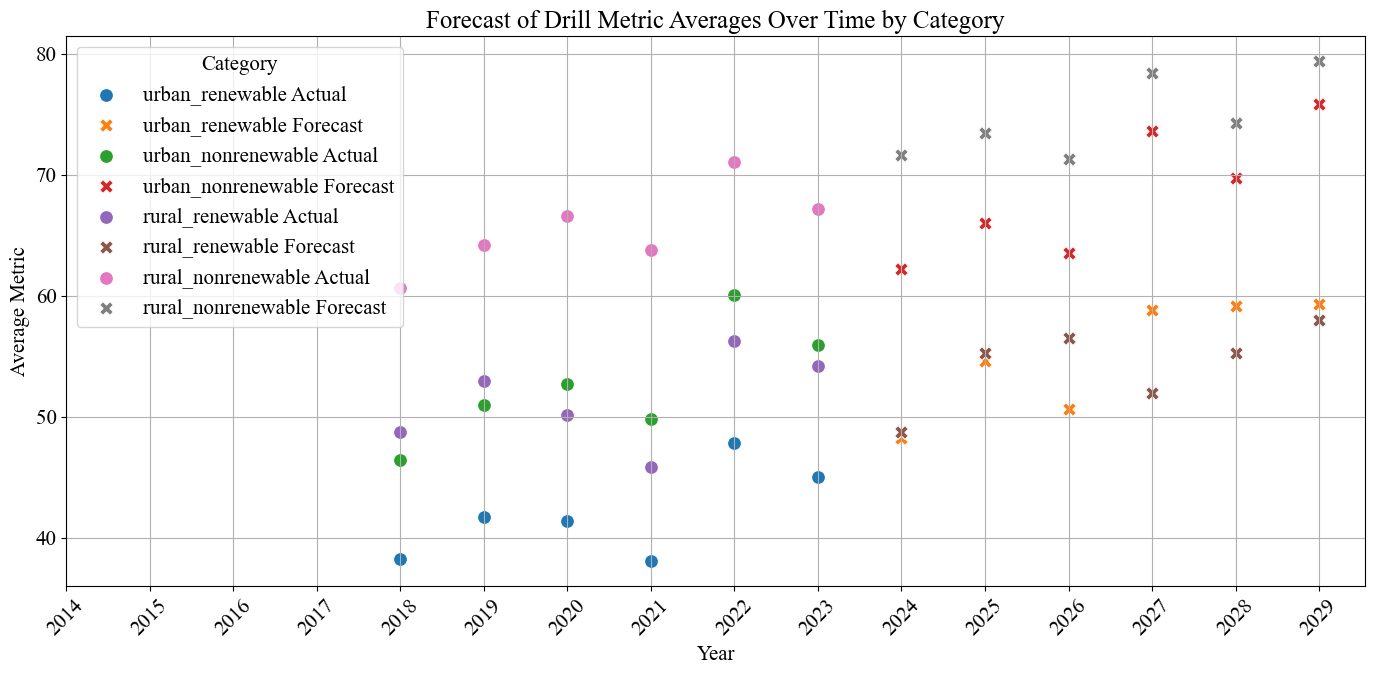

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Function to perform ARIMA forecast and plot
def perform_arima_forecast_and_plot(data, title, st):
    plt.figure(figsize=(14, 7))
    categories = data['Category'].unique()
    years = np.arange(2014, 2024)  # Base years for existing data

    forecast_years = np.arange(2030-st, 2030)  # Forecasting 6 years into the future

    for category in categories:
        category_data = data[data['Category'] == category]
        # Ensure the data is in year order
        category_data = category_data.sort_values(by='Year')
        # Fit ARIMA model (Order (1,1,1) chosen as a starting point for simplicity)
        model = ARIMA(category_data['Average'], order=(2,2,1))
        model_fit = model.fit()
        # Forecast

        forecast = model_fit.forecast(steps=st)
        
        # Plot existing data
        sns.scatterplot(x=category_data['Year'], y=category_data['Average'], label=f"{category} Actual", s=100)
        
        # Plot forecast
        sns.scatterplot(x=forecast_years, y=forecast, label=f"{category} Forecast", s=100, marker='X')

    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Average Metric')
    plt.xticks(np.concatenate((years, forecast_years)), rotation=45)
    plt.legend(title='Category')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Perform forecasting and plotting for CO2 and Drill metrics separately, using the data with 0 values removed
perform_arima_forecast_and_plot(df_averages_co2_melted_no_zeros, "Forecast of CO2 Metric Averages Over Time by Category", 8)
perform_arima_forecast_and_plot(df_averages_drill_melted_no_zeros, "Forecast of Drill Metric Averages Over Time by Category", 6)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


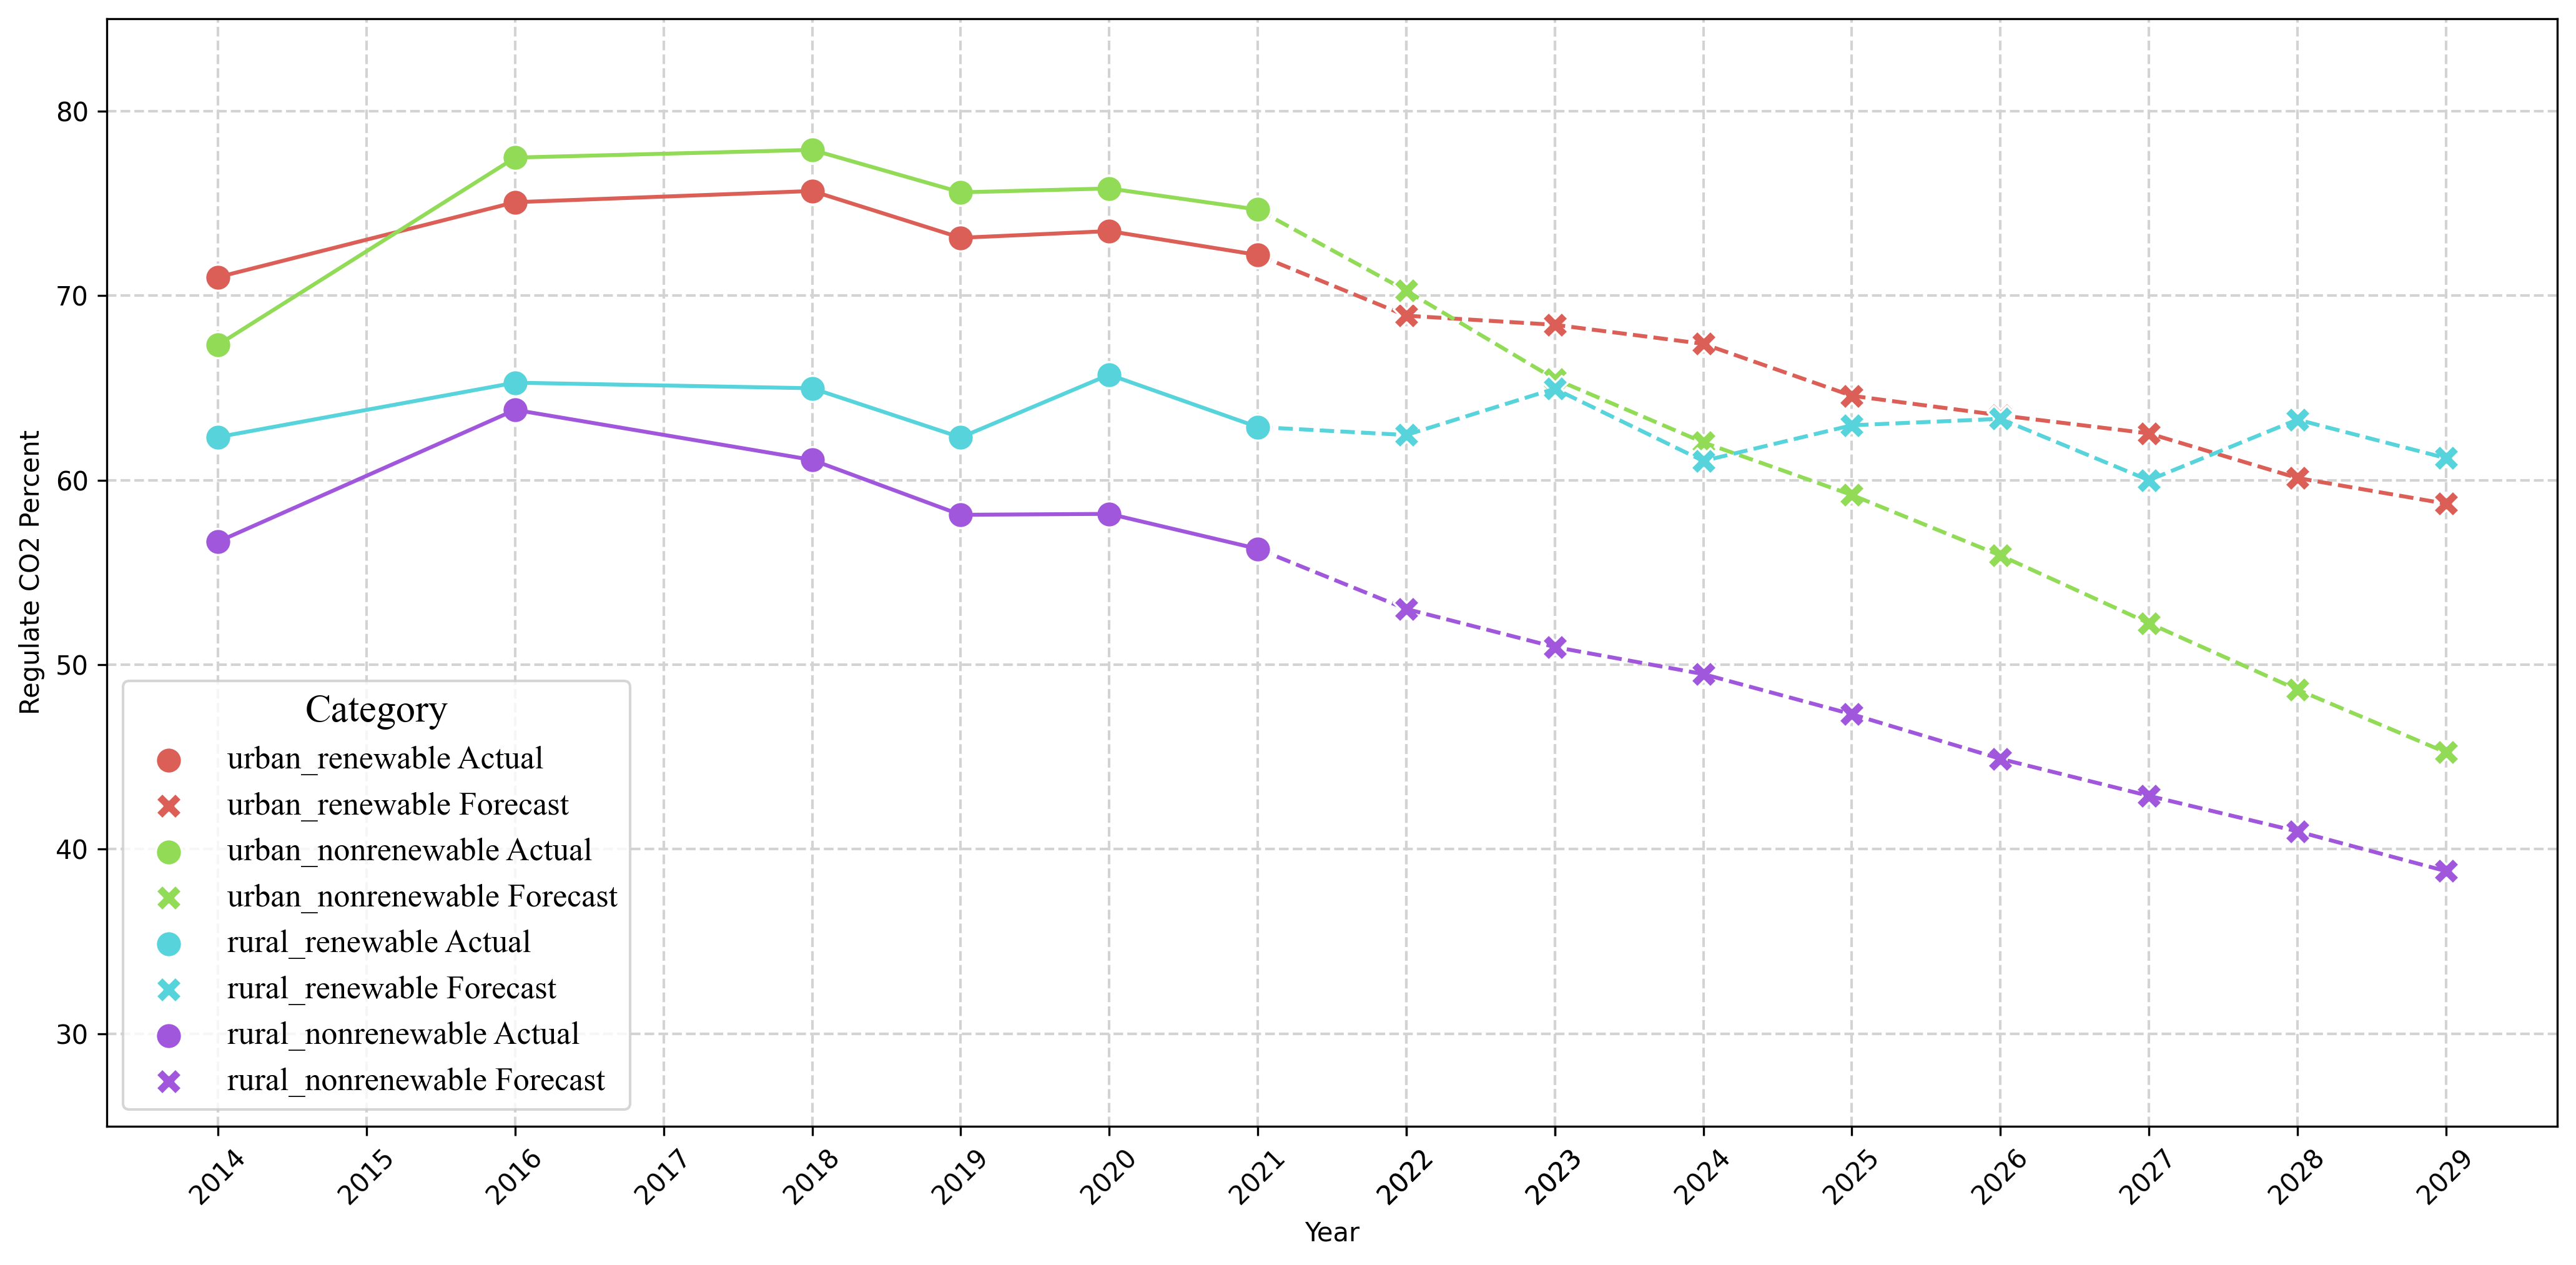

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

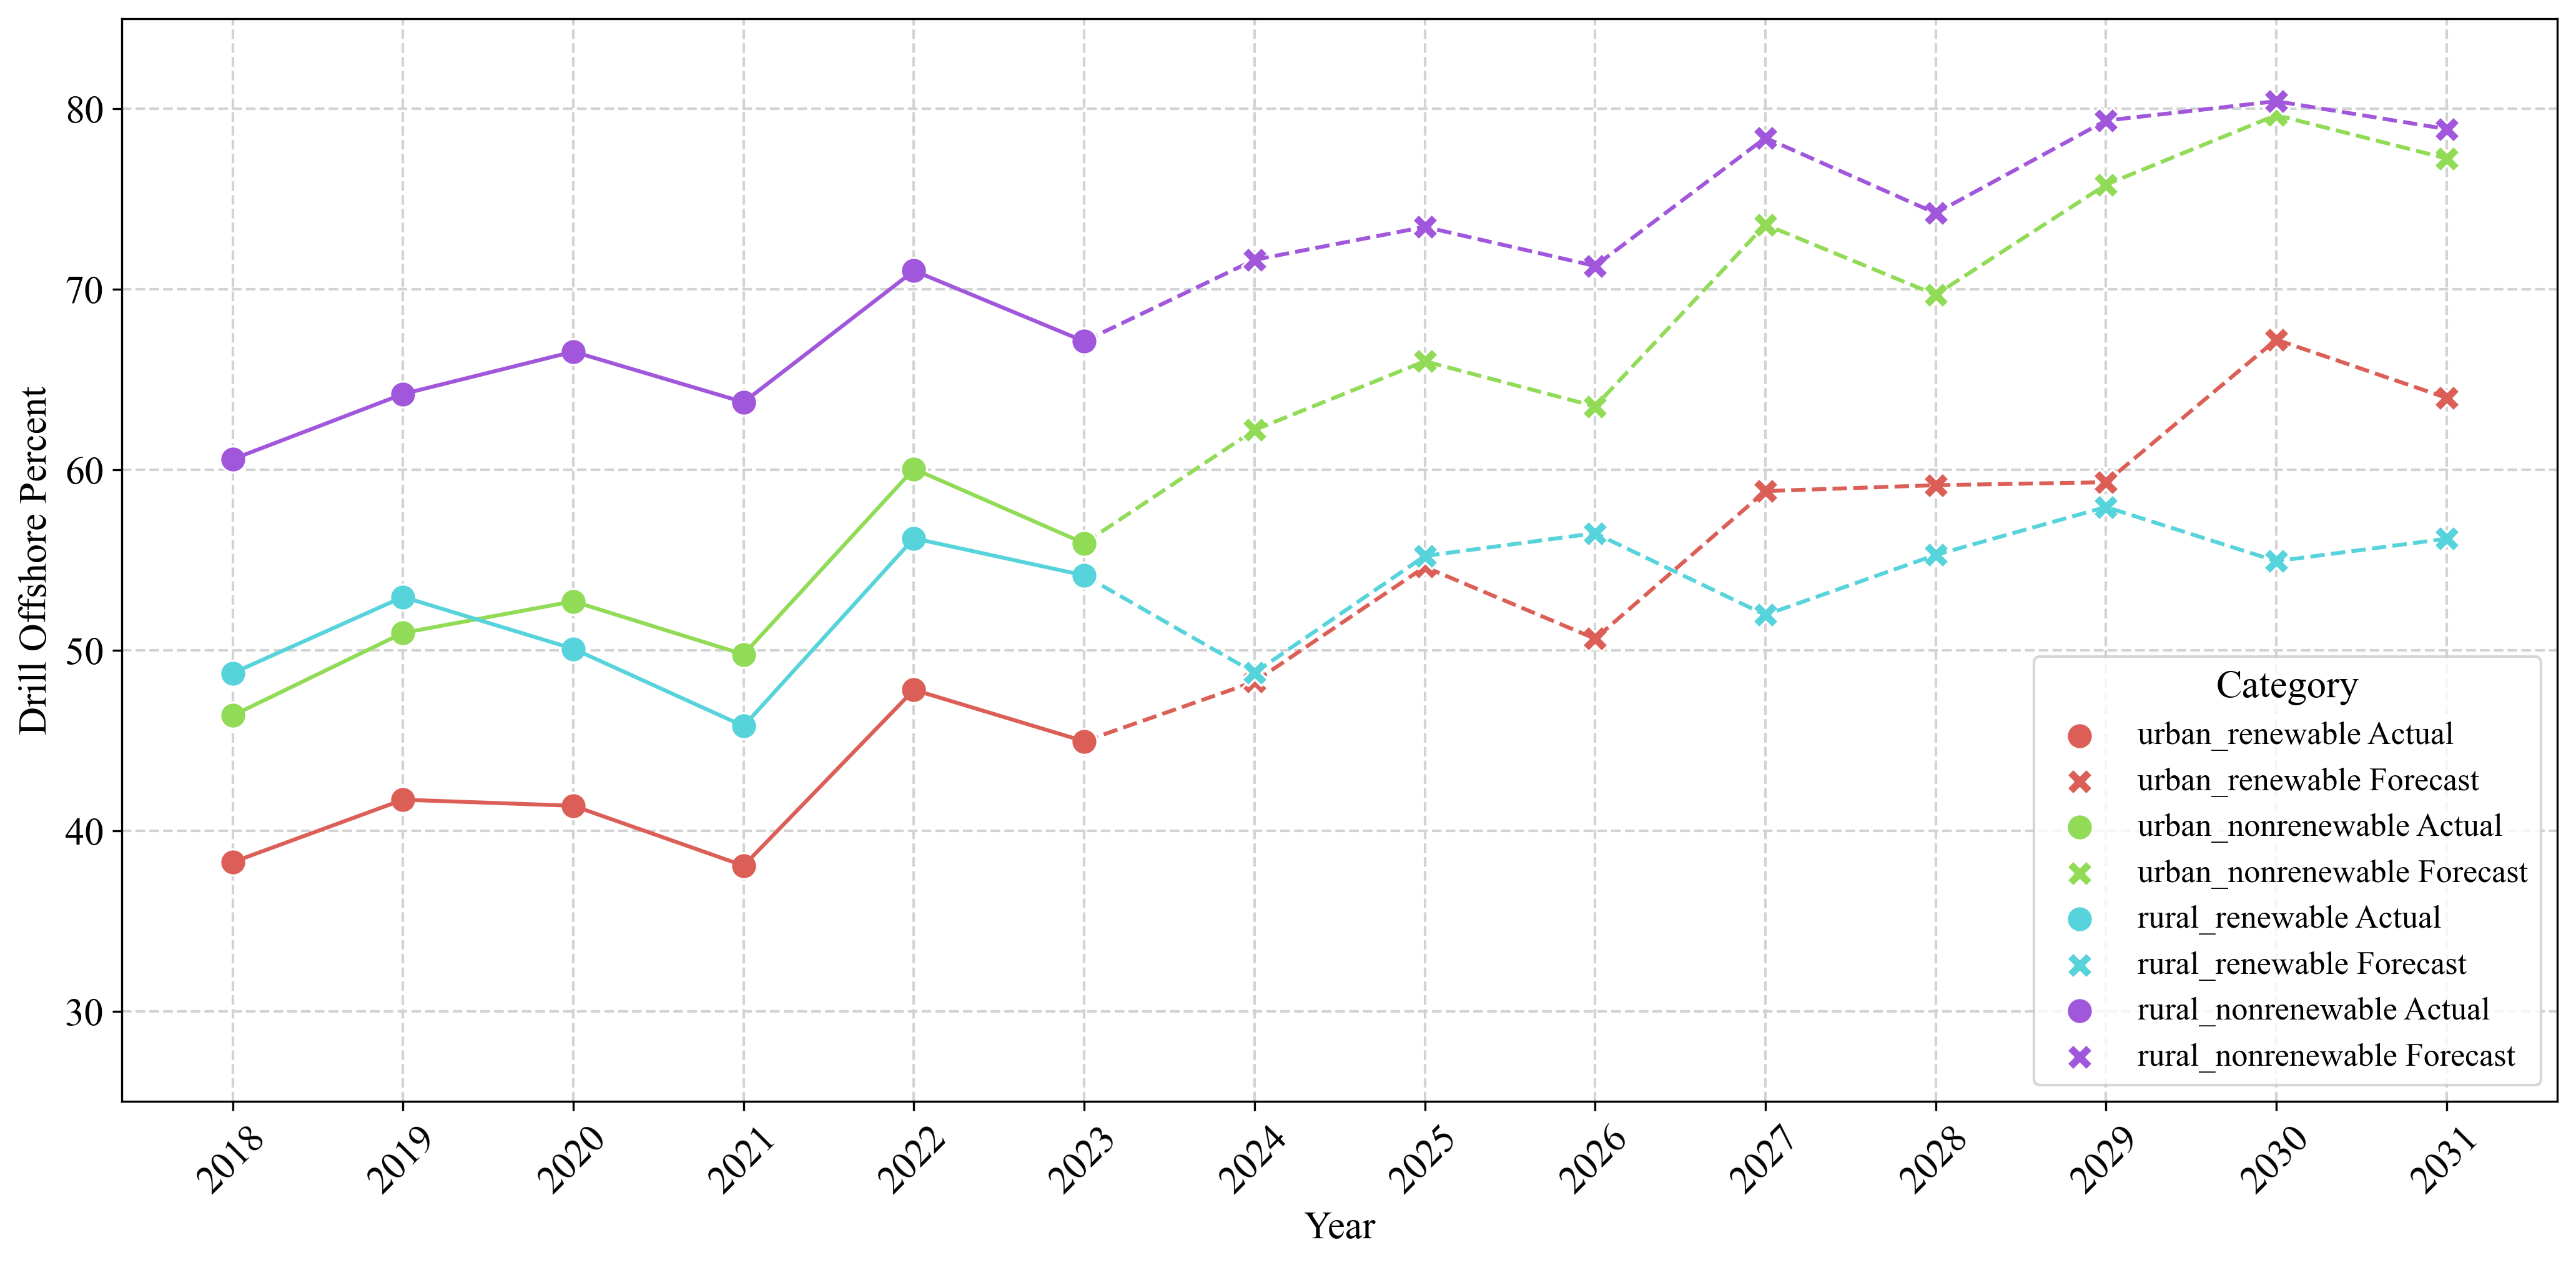

In [71]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec

# Function to perform ARIMA forecast and plot
def perform_arima_forecast_and_plot(data, title, st, y_limits = [25, 85], calm = "1"):
    fig = plt.figure(figsize=(14, 7), dpi=300)  # Set DPI to 300
    # gs = gridspec.GridSpec(1, 1)
    # ax = fig.add_subplot(gs[0])

    plt.grid(True, which = 'both', linestyle = '--', linewidth = 1, color = 'lightgray')

    ax = plt.gca()

    # ax.grid(True, linestyle='--')
    
    categories = data['Category'].unique()

    if st == 8:
        years = np.arange(2014, 2024)
        forecast_years = np.arange(2030-st, 2030)
    else:
        years = np.arange(2018, 2024)  # Base years for existing data
        forecast_years = np.arange(2030-st, 2032)
        st += 2

    if y_limits is not None:
        ax.set_ylim(y_limits)

  # Forecasting 6 years into the future

    # Set the font to Times New Roman
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = "15"

    color_palette = sns.color_palette("hls", len(categories))

    for i, category in enumerate(categories):
        category_data = data[data['Category'] == category]
        category_data = category_data.sort_values(by='Year')
        model = ARIMA(category_data['Average'], order=(2,2,1))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=st)

        base_color = color_palette[i]

        # Plot existing data with a solid line
        sns.scatterplot(x=category_data['Year'], y=category_data['Average'], label=f"{category} Actual", s=100, color=base_color, ax=ax, zorder=3)
        ax.plot(category_data['Year'], category_data['Average'], color=base_color, zorder=3)

        # Plot forecast with a dashed line
        sns.scatterplot(x=forecast_years, y=forecast, label=f"{category} Forecast", s=100, marker='X', color=base_color, ax=ax, zorder=3)
        ax.plot(forecast_years, forecast, color=base_color, linestyle='dashed', zorder=3)

        if calm == "1":
            drill_data_2021 = category_data[category_data['Year'] == 2021]['Average'].values[0]
            if len(forecast) > 0:
                drill_data_2022 = forecast.iloc[0]
            else:
                print("Forecasting failed: forecast array is empty.")
            ax.plot([2021, 2022], [drill_data_2021, drill_data_2022], color=base_color, linestyle='dashed')
        else:
            co2_data_2023 = category_data[category_data['Year'] == 2023]['Average'].values[0]
            if len(forecast) > 0:
                co2_data_2024 = forecast.iloc[0]
            else:
                print("Forecasting failed: forecast array is empty.")
            ax.plot([2023, 2024], [co2_data_2023, co2_data_2024], color=base_color, linestyle='dashed')

    
    # ax.set_title(title)
    ax.set_xlabel('Year')
    if calm == "1":
        ax.set_ylabel('Regulate CO2 Percent')
    else:
        ax.set_ylabel('Drill Offshore Percent')

    ax.set_xticks(np.concatenate((years, forecast_years)))
    plt.xticks(rotation=45)
    ax.legend(title='Category', fontsize='small')
    plt.tight_layout()
    plt.show()

# Perform forecasting and plotting for CO2 and Drill metrics separately, using the data with 0 values removed
perform_arima_forecast_and_plot(df_averages_co2_melted_no_zeros, "Forecast of CO2 Metric Averages Over Time by Category", 8, [25, 85], "1")
perform_arima_forecast_and_plot(df_averages_drill_melted_no_zeros, "Forecast of Drill Metric Averages Over Time by Category", 6, [25, 85], "0")

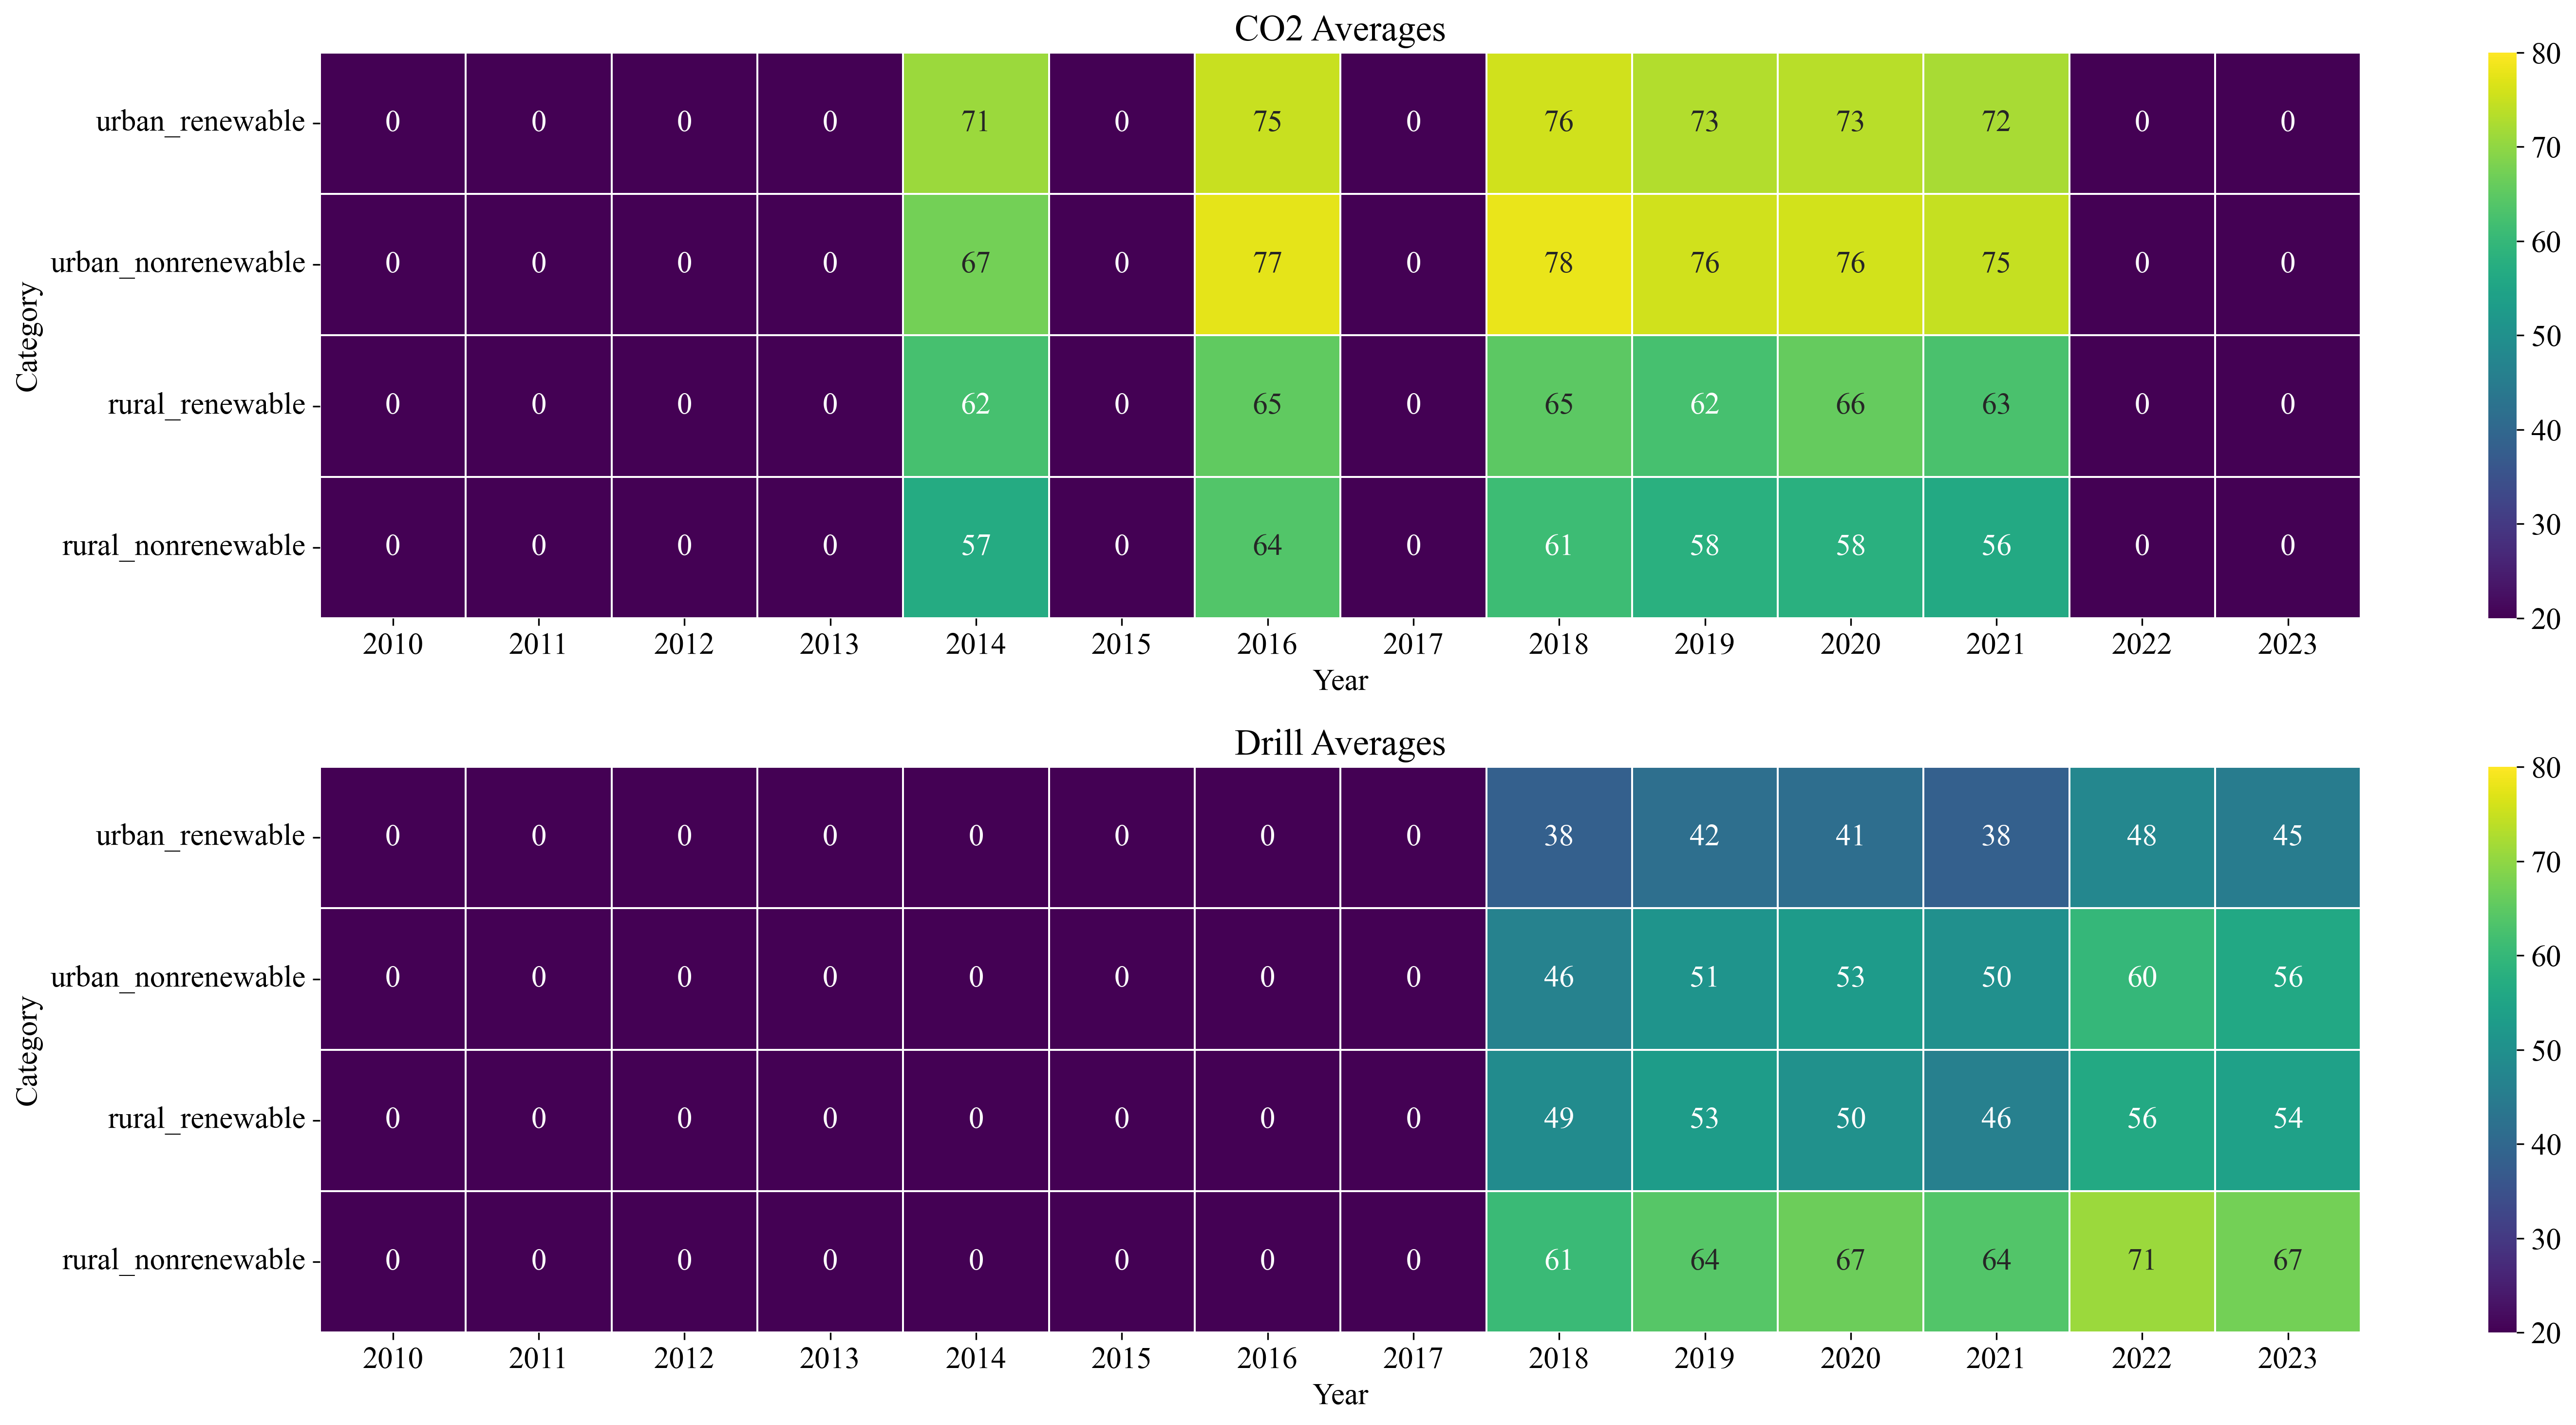

In [ ]:
# Adjusting the plotting function to correct the issue encountered previously
def plot_metric_averages_corrected(df_co2, df_drill):
    # Setting up the figure layout
    fig, ax = plt.subplots(2, 1, figsize=(20, 10), dpi=300)  # Set DPI to 300

    # Plot for CO2
    sns.heatmap(df_co2.T, ax=ax[0], cmap="viridis", annot=True, linewidths=.5, vmin=20, vmax=80)
    ax[0].set_title('CO2 Averages')
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Category')

    # Plot for Drill
    sns.heatmap(df_drill.T, ax=ax[1], cmap="viridis", annot=True, linewidths=.5, vmin=20, vmax=80)
    ax[1].set_title('Drill Averages')
    ax[1].set_xlabel('Year')
    ax[1].set_ylabel('Category')

    plt.tight_layout()
    plt.show()

plot_metric_averages_corrected(df_averages_co2, df_averages_drill)

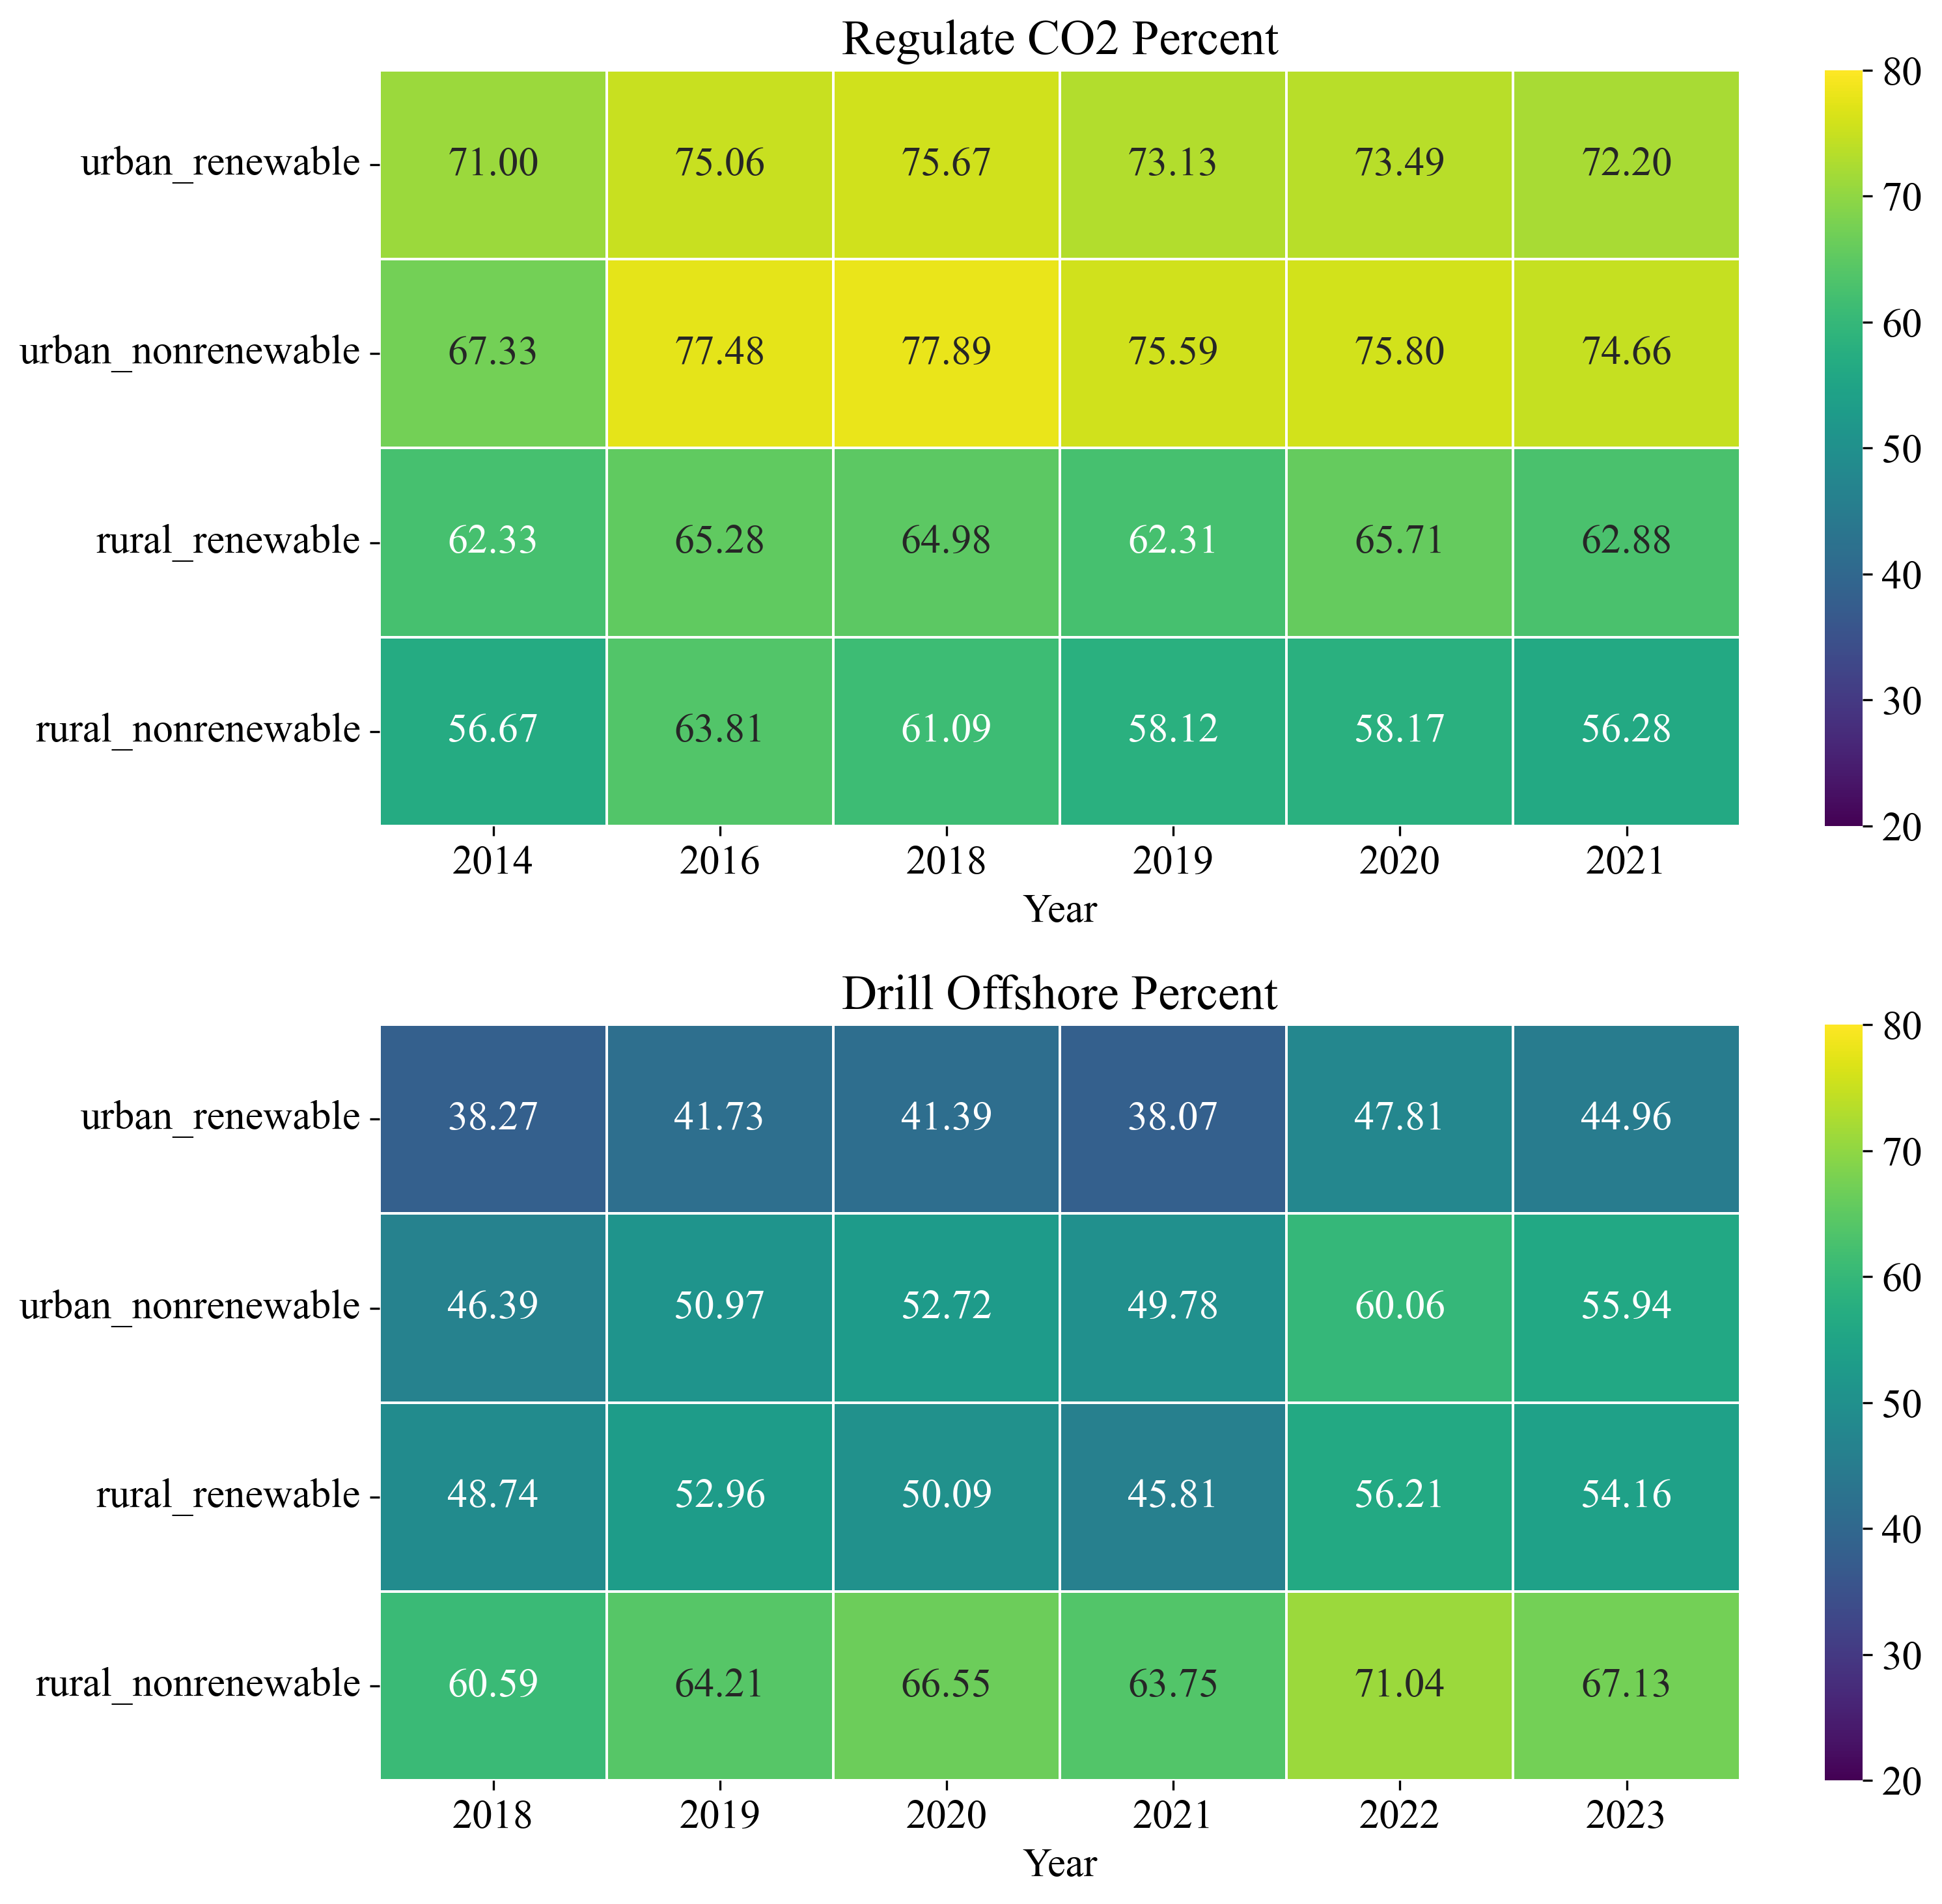

In [ ]:
import numpy as np

# Adjusting the plotting function to correct the issue encountered previously
def plot_metric_averages_corrected(df_co2, df_drill):
    # Replace 0s with NaN and drop rows/columns with NaN values
    df_co2 = df_co2.replace(0, np.nan).dropna(axis=0, how='any').dropna(axis=1, how='any')
    df_drill = df_drill.replace(0, np.nan).dropna(axis=0, how='any').dropna(axis=1, how='any')

    # Setting up the figure layout
    fig, ax = plt.subplots(2, 1, figsize=(11, 10), dpi=300)  # Set DPI to 300

    # Plot for CO2
    sns.heatmap(df_co2.T, ax=ax[0], cmap="viridis", annot=True, linewidths=.5, vmin=20, vmax=80, fmt=".2f")
    ax[0].set_title('Regulate CO2 Percent')  # Rename title
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('')  # Remove 'Category' label

    # Plot for Drill
    sns.heatmap(df_drill.T, ax=ax[1], cmap="viridis", annot=True, linewidths=.5, vmin=20, vmax=80, fmt=".2f")
    ax[1].set_title('Drill Offshore Percent')  # Rename title
    ax[1].set_xlabel('Year')
    ax[1].set_ylabel('')  # Remove 'Category' label

    plt.tight_layout()
    plt.show()

plot_metric_averages_corrected(df_averages_co2, df_averages_drill)